## **Unsupervised Learning :**

Unsupervised learning is used against data without any historical labels. The system is not subjected to a pre-determined set of outputs, correlations between inputs and outputs or a “correct answer.” The algorithm must figure out what it is viewing by itself, as it does not have any storage of reference points. The goal is to explore the data and find some sort of patterns or structures.

Unsupervised learning can be classified into:

- **Clustering :** Clustering is the task of dividing the population or data points into several groups, such that data points in a group are homogenous to each other than those in different groups. There are numerous clustering algorithms, some of them are – “K-means clustering algorithms”, “mean shift”, “hierarchal clustering”, etc.

- **Association :** An association rule is an unsupervised learning method that is used for finding the relationships between variables in a large database. It determines the set of items that occurs together in the dataset.

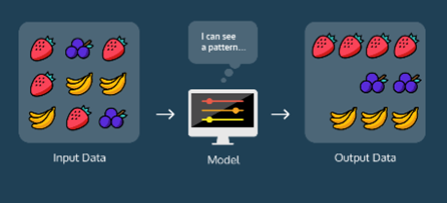




**K-means Clustering:** \
The goal of the K-means clustering algorithm is to find groups in the data, with the number of groups represented by the variable K. The algorithm works iteratively to assign each data point to one of the K groups based on the features that are provided.

The outputs of executing a K-means on a dataset are:

- K centroids: Centroids for each of the K clusters identified from the dataset.

- Labels for the training data: Complete dataset labelled to ensure each data point is assigned to one of the clusters.

### **About Dataset**

The Iris flower data set or Fisher's Iris data set is a multivariate data set introduced by the British statistician, eugenicist, and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems as an example of linear discriminant analysis. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. Two of the three species were collected in the Gaspé Peninsula "all from the same pasture, and picked on the same day and measured at the same time by the same person with the same apparatus".Fisher's paper was published in the journal, the Annals of Eugenics, creating controversy about the continued use of the Iris dataset for teaching statistical techniques today.

It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

The columns in this dataset are:

Id \
SepalLengthCm \
SepalWidthCm  \
PetalLengthCm \
PetalWidthCm \
Species. 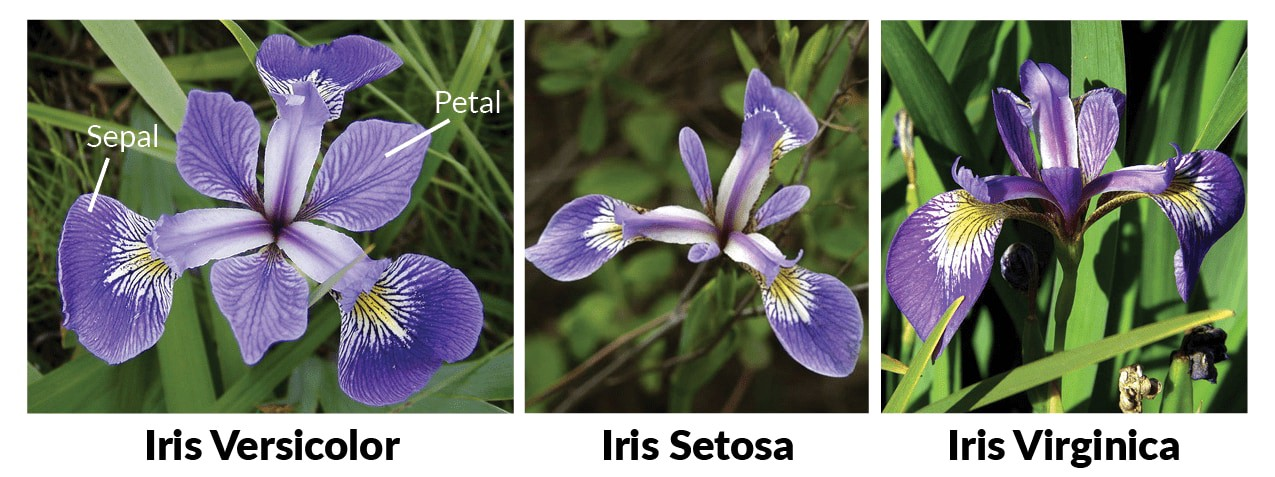
source image:https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png


### **Import libraries**

In [12]:
# Load libraries
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

### **Loading dataset**

In [2]:
# Load dataset 
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pd.read_csv(url, names=names)

### **Exploratory Data Analysis**

In [3]:
#shape
dataset.shape

(150, 5)

In [4]:
#head
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
#description
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal-length  150 non-null    float64
 1   sepal-width   150 non-null    float64
 2   petal-length  150 non-null    float64
 3   petal-width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# class distribution
dataset.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

**Note :** from class distribution you can see that the dataset is balanced.

### **Visualization**
some graphical representation of information and data.

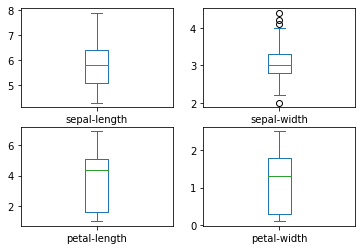

In [8]:
# box and whisker plots
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
plt.show()

You can notice that there are **outliers** in sepal-width feature

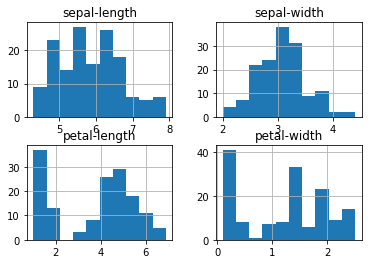

In [9]:
# histograms
dataset.hist()
plt.show()

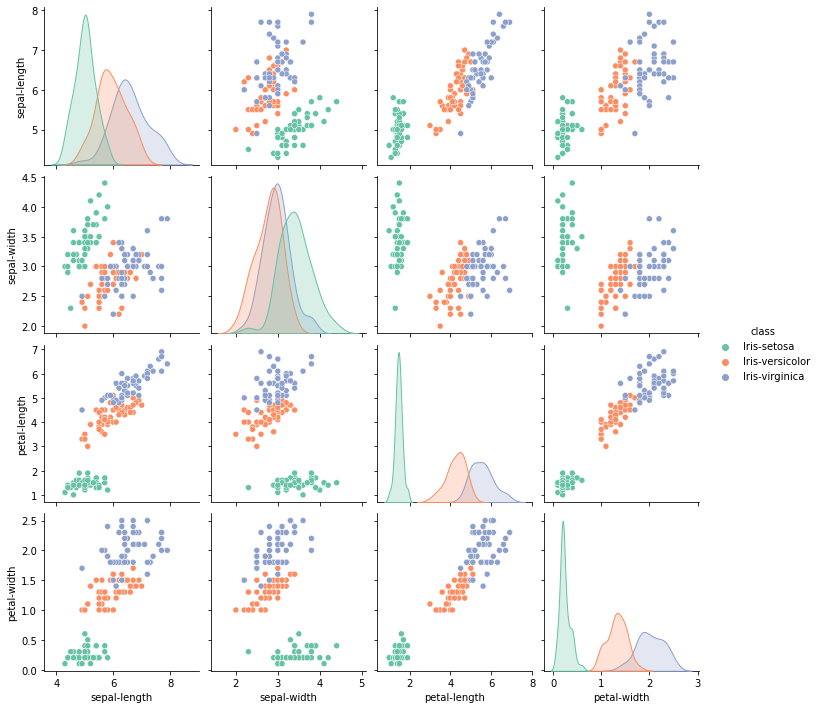

In [10]:
# pair plot
sns.pairplot(data=dataset,hue="class",palette="Set2")
plt.show()

Pairwise is useful when you want to visualize the distribution of a variable or the relationship between multiple variables separately within subsets of your dataset.

We see that iris-setosa is easily separable from the other two. Especially when we can see in different colors for corresponding Labels like above. \

But our mission was finding the Labels that we didn't knew at all, So Let's create a suitable scenario.

### **Implemeting the K Means Clustering**

**How to Implementing K-Means Clustering ?**
1. Choose the number of clusters k
2. Select k random points from the data as centroids
3. Assign all the points to the closest cluster centroid
4. Recompute the centroids of newly formed clusters
5. Repeat steps 3 and 4

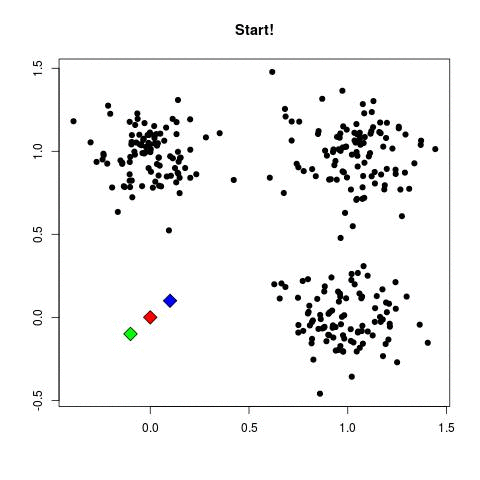

#### **Choose the number of clusters k**

we assume that we don't know labels because we deal with unsupervised learning problem, so based on that we must not know the number of clusters k, but don't worry there is a solution.

#### **Finding the best amount of clusters to get most accurate results (KMeans)**\ 
we are going to use  the elbow method to determine the optimal number of clusters for k-means clustering.

In [16]:
#create arrays of observations and labels
X = dataset.drop('class', axis=1).values
print(X.shape)

(150, 4)


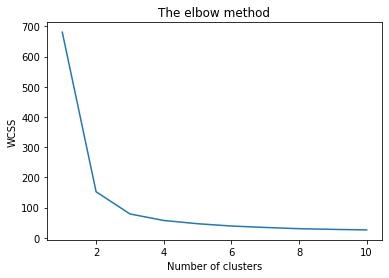

In [18]:
#Finding the optimum number of clusters for k-means classification
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
    
#Plotting the results onto a line graph, allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # within cluster sum of squares
plt.show()

**3** seems to be our Best value(s) for clusters. **(By the Elbow Rule)**

In [19]:
#Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

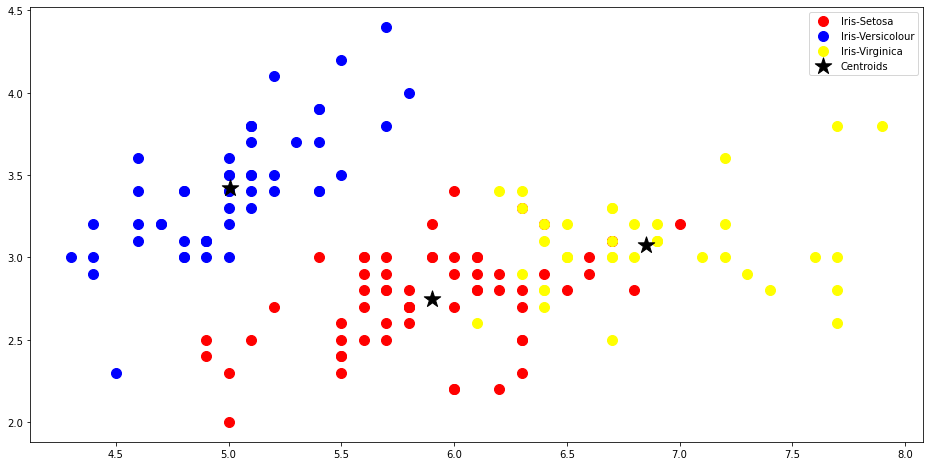

In [27]:
#Visualising the clusters
plt.figure(figsize=(16,8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Iris-Setosa')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Iris-Versicolour')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'yellow', label = 'Iris-Virginica')

#Plotting the centroids of the clusters

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 300, c = 'black', label = 'Centroids',marker='*')
plt.legend()
plt.show()

### **References :**
[K-Means Clustering Implementation in Python](https://www.kaggle.com/code/andyxie/k-means-clustering-implementation-in-python) \
[Unsupervised Learning on Iris](https://www.kaggle.com/code/efeergun96/unsupervised-learning-on-iris) \
[Iris Dataset - Exploratory Data Analysis](https://www.kaggle.com/code/lalitharajesh/iris-dataset-exploratory-data-analysis) \
[K-Means Clustering of Iris Dataset](https://www.kaggle.com/code/khotijahs1/k-means-clustering-of-iris-dataset) \
[Analyzing Decision Tree and K-means Clustering using Iris dataset](https://www.analyticsvidhya.com/blog/2021/06/analyzing-decision-tree-and-k-means-clustering-using-iris-dataset/) \
[TOP Machine Learning Algorithms -Beginner](https://www.kaggle.com/code/marcovasquez/top-machine-learning-algorithms-beginner#6--Visualization)
